In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("analysis.xlsx",index_col = "Hours")
df

,Demand (MW),Wind generation (MW)
Hours,,
1,5151.0,3360.0
2,5046.0,3351.0
3,4933.5,3334.5
4,4785.0,3280.5
5,4722.0,3342.0
...,...,...
2846,7648.5,2797.5
2847,7695.0,2683.5
2848,7722.0,2494.5


In [3]:
df.columns

Index(['Demand (MW)', 'Wind generation (MW)'], dtype='object')

In [4]:
df= df[  [df.columns[0] , df.columns[1] ]   ] 

df

,Demand (MW),Wind generation (MW)
Hours,,
1,5151.0,3360.0
2,5046.0,3351.0
3,4933.5,3334.5
4,4785.0,3280.5
5,4722.0,3342.0
...,...,...
2846,7648.5,2797.5
2847,7695.0,2683.5
2848,7722.0,2494.5


In [5]:
df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850],
           dtype='int64', name='Hours', length=2850)

In [6]:
for k in df.index:
    
    if df.loc[k, "Wind generation (MW)"] > df.loc[k, "Demand (MW)"]:
        df.loc[k, "Net load (MW)"] = 0
    else:
        df.loc[k, "Net load (MW)"] = df.loc[k, "Demand (MW)"] - df.loc[k, "Wind generation (MW)"]
        

In [7]:
df

,Demand (MW),Wind generation (MW),Net load (MW)
Hours,,,
1,5151.0,3360.0,1791.0
2,5046.0,3351.0,1695.0
3,4933.5,3334.5,1599.0
4,4785.0,3280.5,1504.5
5,4722.0,3342.0,1380.0
...,...,...,...
2846,7648.5,2797.5,4851.0
2847,7695.0,2683.5,5011.5
2848,7722.0,2494.5,5227.5


In [7]:
df["Net load (MW)"].min()

957.0

Text(0.5, 1.0, 'Net load')

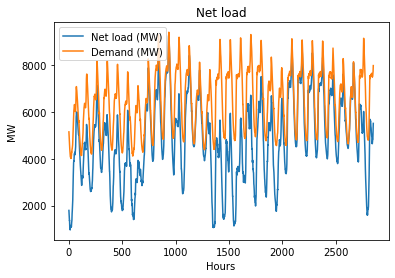

In [8]:
df[ ["Net load (MW)",  "Demand (MW)" ] ].plot()
plt.ylabel("MW")
plt.title("Net load")

In [10]:
df

,Demand (MW),Wind generation (MW),Net load (MW)
Hours,,,
1,5151.0,3360.0,1791.0
2,5046.0,3351.0,1695.0
3,4933.5,3334.5,1599.0
4,4785.0,3280.5,1504.5
5,4722.0,3342.0,1380.0
...,...,...,...
2846,7648.5,2797.5,4851.0
2847,7695.0,2683.5,5011.5
2848,7722.0,2494.5,5227.5


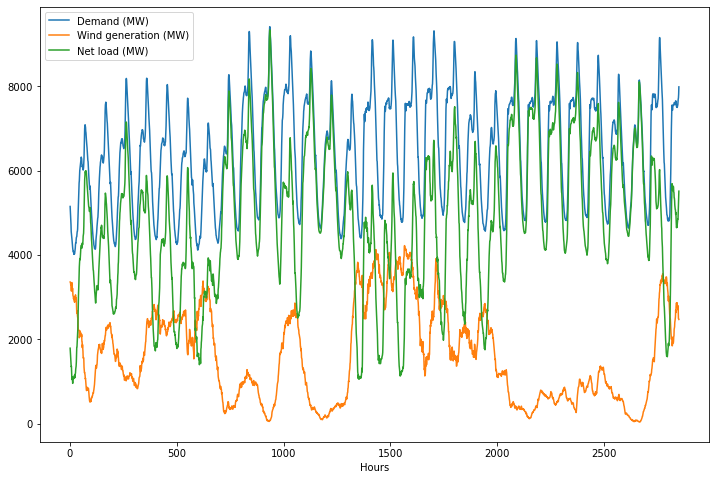

In [14]:
df.plot(figsize=(12,8))

In [15]:
#Sort values by net load in descending order
df.sort_values(by = "Net load (MW)", ascending = False, inplace = True)

In [16]:
df

,Demand (MW),Wind generation (MW),Net load (MW)
Hours,,,
936,9412.5,75.0,9337.5
935,9411.0,78.0,9333.0
937,9346.5,75.0,9271.5
934,9309.0,78.0,9231.0
938,9180.0,82.5,9097.5
...,...,...,...
15,4086.0,3028.5,1057.5
1353,4674.0,3619.5,1054.5
10,4347.0,3300.0,1047.0


In [17]:
len(df)

2850

In [18]:
df.index = np.arange(0, len(df))
df

,Demand (MW),Wind generation (MW),Net load (MW)
0,9412.5,75.0,9337.5
1,9411.0,78.0,9333.0
2,9346.5,75.0,9271.5
3,9309.0,78.0,9231.0
4,9180.0,82.5,9097.5
...,...,...,...
2845,4086.0,3028.5,1057.5
2846,4674.0,3619.5,1054.5
2847,4347.0,3300.0,1047.0
2848,4224.0,3210.0,1014.0


Text(0.5, 0, 'Hours')

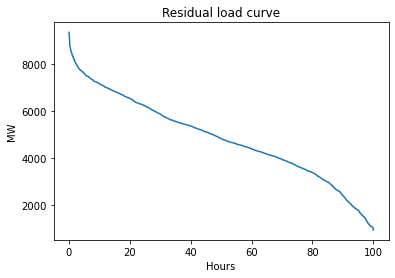

In [37]:
df["Net load (MW)"].plot()

plt.ylabel("MW")
plt.title("Residual load curve")
plt.xlabel("Hours")

In [38]:
df.index

Float64Index([               0.0, 0.0351000351000351, 0.0702000702000702,
              0.1053001053001053, 0.1404001404001404, 0.1755001755001755,
              0.2106002106002106, 0.2457002457002457, 0.2808002808002808,
              0.3159003159003159,
              ...
               99.68409968409968,  99.71919971919972,  99.75429975429975,
                99.7893997893998,  99.82449982449982,  99.85959985959985,
                99.8946998946999,  99.92979992979993,  99.96489996489997,
                           100.0],
             dtype='float64', name='new index', length=2850)

In [39]:
df.index*100

Float64Index([               0.0,   3.51000351000351,   7.02000702000702,
               10.53001053001053,  14.04001404001404,  17.55001755001755,
               21.06002106002106,  24.57002457002457,  28.08002808002808,
              31.590031590031593,
              ...
               9968.409968409967,  9971.919971919971,  9975.429975429975,
                9978.93997893998,  9982.449982449982,  9985.959985959986,
                9989.46998946999,  9992.979992979992,  9996.489996489998,
                         10000.0],
             dtype='float64', name='new index', length=2850)

In [36]:
df.index.max()

100.0

In [22]:
df["new index"] = df.index*100/df.index.max()
df.set_index("new index", inplace = True)
df

,Demand (MW),Wind generation (MW),Net load (MW)
new index,,,
0.0000,9412.5,75.0,9337.5
0.0351,9411.0,78.0,9333.0
0.0702,9346.5,75.0,9271.5
0.1053,9309.0,78.0,9231.0
0.1404,9180.0,82.5,9097.5
...,...,...,...
99.8596,4086.0,3028.5,1057.5
99.8947,4674.0,3619.5,1054.5
99.9298,4347.0,3300.0,1047.0


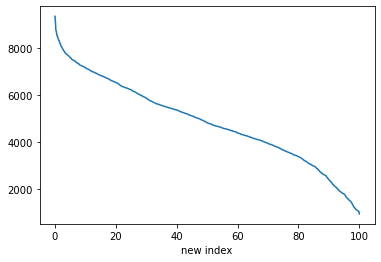

In [23]:
df["Net load (MW)"].plot()

Text(0.5, 0, 'Capacity utilisation (% of time)')

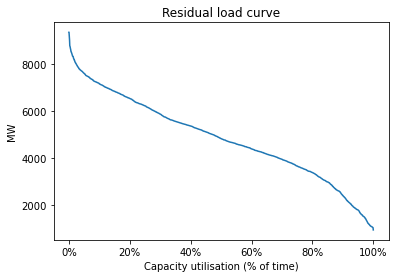

In [24]:

import matplotlib.ticker as mtick

fig, ax = plt.subplots()
ax = df["Net load (MW)"].plot()

ax.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.ylabel("MW")
plt.title("Residual load curve")
plt.xlabel("Capacity utilisation (% of time)")

In [25]:
df["Net load (MW)"].min()

957.0

In [26]:
df.index

Float64Index([               0.0, 0.0351000351000351, 0.0702000702000702,
              0.1053001053001053, 0.1404001404001404, 0.1755001755001755,
              0.2106002106002106, 0.2457002457002457, 0.2808002808002808,
              0.3159003159003159,
              ...
               99.68409968409968,  99.71919971919972,  99.75429975429975,
                99.7893997893998,  99.82449982449982,  99.85959985959985,
                99.8946998946999,  99.92979992979993,  99.96489996489997,
                           100.0],
             dtype='float64', name='new index', length=2850)

In [27]:
len(df.index)

2850

In [28]:
df.index[2850/2]

50.017550017550015

In [29]:
df.loc[ df.index[2850/2] , df.columns[0]]

5187.0